<a href="https://colab.research.google.com/github/ajay47847/Internship_Task/blob/main/fftNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1700x1000 with 0 Axes>

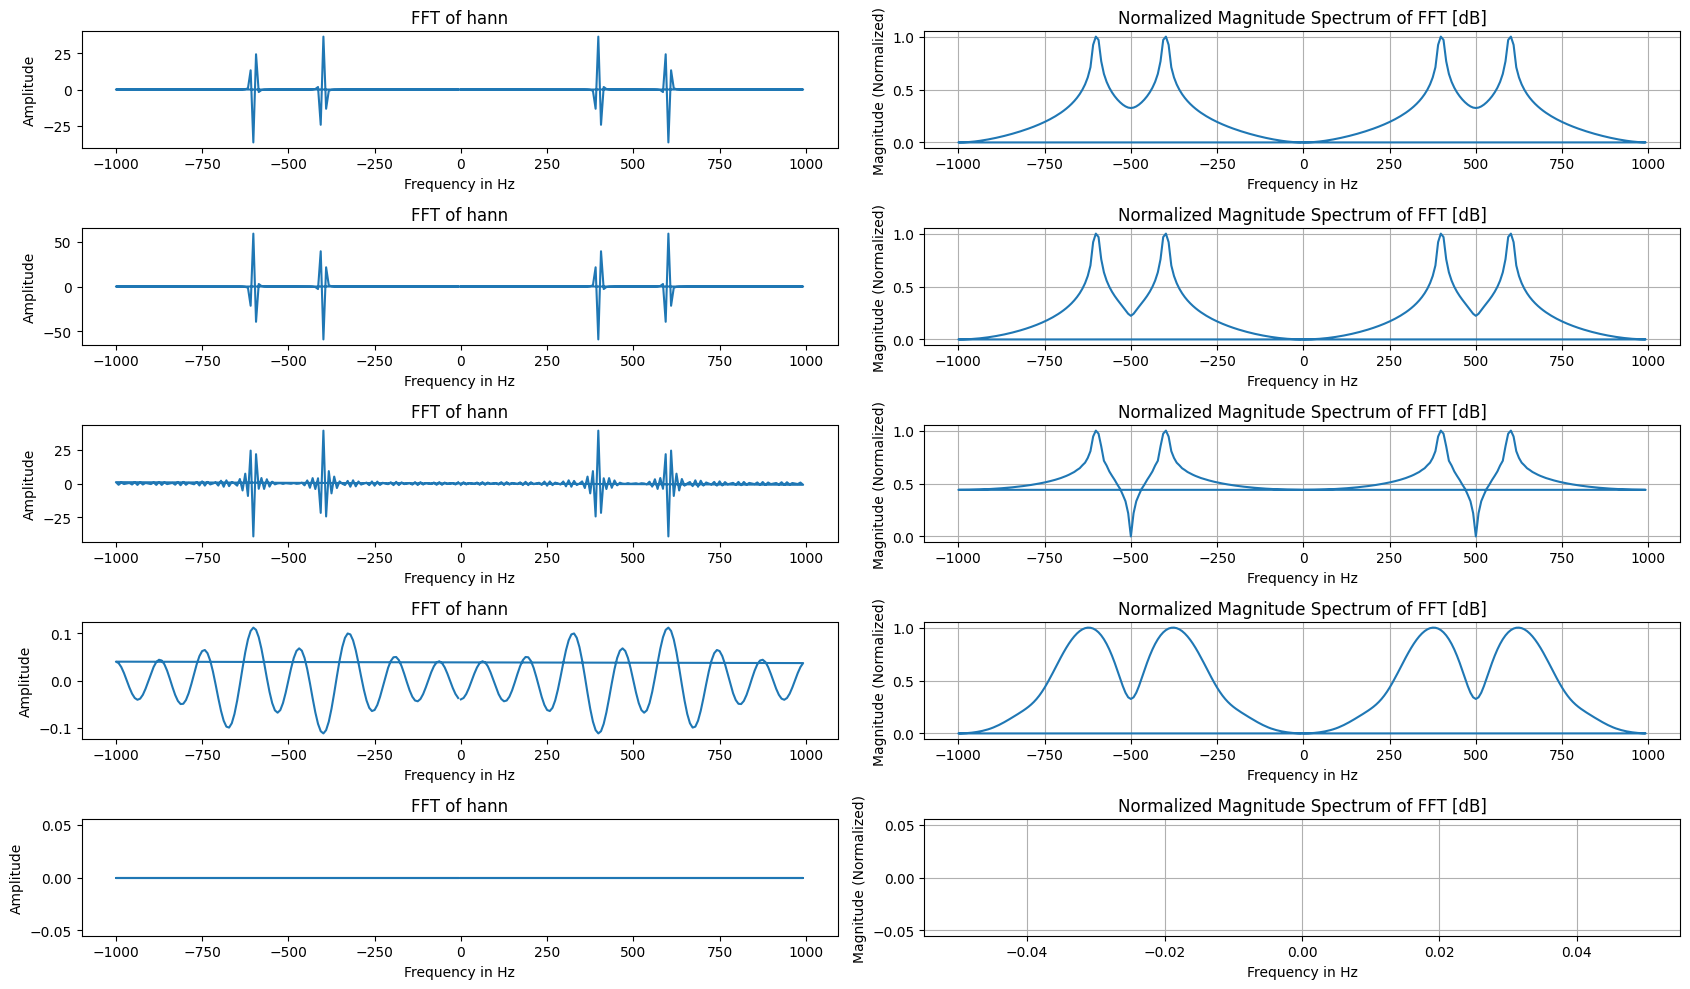

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.signal import get_window

fs = 2000
duration=0.2
t = np.arange(0,duration,1/fs)
signal1 = np.sin(2 * np.pi * 400 * t)
signal2 = np.sin(2 * np.pi * 600 * t)
signal3 = signal1 + signal2


plt.figure(figsize=(17, 10))

total_length = 768
padding_amount = total_length - len(signal3)
padding_each_side = padding_amount // 2

# Apply symmetric padding
padded_signal3 = np.pad(signal3, (padding_each_side, padding_amount - padding_each_side), 'constant')
plt.figure(figsize=(17, 10))

padded_signal3 = np.pad(signal3, (0, 768 - len(signal3)), 'constant')

def plot_fft_magnitude(signal_segment, window_name, subplot_index):
    window = get_window(window_name, len(signal_segment))
    windowed_signal = signal_segment * window

    fft_result = np.fft.fft(windowed_signal)
    freq_values = np.fft.fftfreq(len(windowed_signal), 1/fs)

    magnitude_spectrum = np.abs(fft_result)
    magnitude_spectrum_dB = 20 * np.log10(magnitude_spectrum)

    # Normalize the magnitude spectrum to [0, 1]
    normalized_magnitude_spectrum_dB = (magnitude_spectrum_dB - np.min(magnitude_spectrum_dB)) / (np.max(magnitude_spectrum_dB) - np.min(magnitude_spectrum_dB))

    ax1 = plt.subplot(5, 2, subplot_index)
    ax1.plot(freq_values, fft_result)
    ax1.set_xlabel('Frequency in Hz')
    ax1.set_ylabel('Amplitude')
    ax1.set_title(f'FFT of {window_name}')

    ax2 = plt.subplot(5, 2, subplot_index + 1)
    ax2.plot(freq_values, normalized_magnitude_spectrum_dB)
    ax2.set_title('Normalized Magnitude Spectrum of FFT [dB]')
    ax2.set_xlabel('Frequency in Hz')
    ax2.set_ylabel('Magnitude (Normalized)')
    ax2.grid(True)

plot_fft_magnitude(padded_signal3[:256], 'hann', 1)
plot_fft_magnitude(padded_signal3[128:384], 'hann', 3)
plot_fft_magnitude(padded_signal3[256:512], 'hann', 5)
plot_fft_magnitude(padded_signal3[384:640], 'hann', 7)
plot_fft_magnitude(padded_signal3[512:768], 'hann', 9)

plt.tight_layout()
plt.show()